<a href="https://colab.research.google.com/github/pj-mathematician/Crowd-for-Good---Cancer-ML-Benchmarking-Challenge/blob/main/c4g_1_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
%%capture
!pip install pytorch-tabnet
# !pip install auto-sklearn

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_auc_score
import lightgbm as lgb
import xgboost as xgb
import matplotlib.pyplot as plt
# from autosklearn.metrics import roc_auc
from pytorch_tabnet.tab_model import TabNetClassifier

In [ ]:
import warnings
warnings.filterwarnings("ignore")

In [ ]:
train = pd.read_csv("/content/drive/MyDrive/topcoder/features_train.csv", header = None)
labels = pd.read_csv("/content/drive/MyDrive/topcoder/labels_train.csv", header = None)
train.head()
# labels.head()

,0,1,2,3,4,5,6,7,8,9,...,15,16,17,18,19,20,21,22,23,24
0,-639.846398,-20.218160,13.121703,0.969719,-3.319413,-0.627030,-1.159837,0.139661,0.279395,0.086965,...,-0.008907,-0.015525,0.015673,0.017045,-0.009947,0.001211,0.003458,0.002279,0.003016,-0.000792
1,-733.763268,-21.981475,10.785480,7.857363,-3.559057,0.401829,0.132493,0.251757,0.334240,-0.065853,...,0.008152,-0.000594,0.002110,-0.000021,-0.005495,0.001496,0.004563,-0.000785,0.003759,-0.000253
2,-738.409551,-37.787782,11.933514,11.354662,-0.661480,1.042572,-1.184917,-0.284079,0.081354,0.091514,...,-0.022260,-0.017678,-0.003029,-0.013972,0.004845,-0.003052,-0.010387,-0.003335,-0.006808,0.000996
3,-459.483782,-10.760582,3.922937,-0.270547,-0.469106,-0.138756,1.312407,-0.094826,0.033043,-0.098848,...,0.022842,-0.001035,0.006235,0.007061,-0.011466,0.000584,0.000723,-0.006737,-0.002057,0.000554
4,3792.004367,-163.777137,290.861899,18.587519,-12.186413,-1.281770,1.498984,-3.258756,2.381384,-0.363096,...,-0.033858,0.017306,0.012762,-0.002139,-0.000149,0.000306,0.002631,-0.002736,0.008987,0.006212


In [ ]:
train=(train-train.mean())/train.std()
train
# train=(train-train.min())/(train.max()-train.min())
# train

,0,1,2,3,4,5,6,7,8,9,...,15,16,17,18,19,20,21,22,23,24
0,-0.937034,-0.215698,0.432369,0.144672,-0.497816,-0.347372,-0.856072,0.238767,0.651365,0.436329,...,-0.536762,-1.178380,1.178480,1.883136,-1.268900,0.191233,0.587806,0.567195,0.800688,-0.393238
1,-1.068459,-0.233678,0.357734,1.009019,-0.534286,0.228837,0.073048,0.430577,0.777877,-0.341563,...,0.484702,-0.050439,0.149968,0.029012,-0.699069,0.236272,0.776360,-0.145035,0.997533,-0.121234
2,-1.074961,-0.394849,0.394410,1.447903,-0.093320,0.587684,-0.874103,-0.486308,0.194538,0.459485,...,-1.336316,-1.341025,-0.239734,-1.486685,0.624392,-0.482457,-1.774661,-0.737786,-1.802005,0.509068
3,-0.684640,-0.119263,0.138496,-0.010972,-0.064044,-0.073916,0.921346,-0.162471,0.083098,-0.509518,...,1.364314,-0.083753,0.462776,0.798431,-1.463324,0.092147,0.121114,-1.528585,-0.543313,0.286015
4,5.264763,-1.679516,9.305350,2.355572,-1.847236,-0.714057,1.055486,-5.576367,5.500081,-1.854624,...,-2.030784,1.301791,0.957733,-0.201096,-0.014812,0.048214,0.446689,-0.598548,2.382598,3.141296
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
355,0.741134,-0.800875,1.131817,-1.654210,2.431218,-0.131421,-0.225379,0.563156,-0.859544,0.154311,...,-0.220125,3.991671,-0.476407,-0.093321,1.716952,0.160101,-0.962430,-1.095063,-0.256391,0.192151
356,-0.326518,-0.309450,-0.376805,-0.243708,-0.633380,0.157861,0.234291,-0.897239,-0.708770,-0.193638,...,-1.448708,1.895337,-0.138726,-0.235863,-0.513990,0.644626,0.449590,1.207366,1.305649,-0.435628
357,1.515852,-0.745421,-0.396142,1.033749,0.311771,-2.351055,0.007666,-0.088935,-0.451364,3.659366,...,0.277343,0.371925,0.665778,-0.229344,0.990712,-0.436627,-2.417450,2.874041,0.311359,1.310949
358,3.066460,-2.043911,-0.287608,1.844960,-1.270410,-0.709039,-1.382108,1.387387,0.954930,-0.190253,...,-0.398503,0.515987,1.171807,1.482782,-0.112727,1.043972,-0.780019,-1.026258,-1.245118,-1.335915


In [ ]:
df = pd.concat([train,labels], axis = 1)
df.head()

,0,1,2,3,4,5,6,7,8,9,...,16,17,18,19,20,21,22,23,24,0
0,-639.846398,-20.218160,13.121703,0.969719,-3.319413,-0.627030,-1.159837,0.139661,0.279395,0.086965,...,-0.015525,0.015673,0.017045,-0.009947,0.001211,0.003458,0.002279,0.003016,-0.000792,1
1,-733.763268,-21.981475,10.785480,7.857363,-3.559057,0.401829,0.132493,0.251757,0.334240,-0.065853,...,-0.000594,0.002110,-0.000021,-0.005495,0.001496,0.004563,-0.000785,0.003759,-0.000253,1
2,-738.409551,-37.787782,11.933514,11.354662,-0.661480,1.042572,-1.184917,-0.284079,0.081354,0.091514,...,-0.017678,-0.003029,-0.013972,0.004845,-0.003052,-0.010387,-0.003335,-0.006808,0.000996,1
3,-459.483782,-10.760582,3.922937,-0.270547,-0.469106,-0.138756,1.312407,-0.094826,0.033043,-0.098848,...,-0.001035,0.006235,0.007061,-0.011466,0.000584,0.000723,-0.006737,-0.002057,0.000554,1
4,3792.004367,-163.777137,290.861899,18.587519,-12.186413,-1.281770,1.498984,-3.258756,2.381384,-0.363096,...,0.017306,0.012762,-0.002139,-0.000149,0.000306,0.002631,-0.002736,0.008987,0.006212,0


In [ ]:
columns = [0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,"target"]
cols = []
for i in columns:
  cols.append(str(i))
df.columns = cols
df.head()

,0,1,2,3,4,5,6,7,8,9,...,16,17,18,19,20,21,22,23,24,target
0,-639.846398,-20.218160,13.121703,0.969719,-3.319413,-0.627030,-1.159837,0.139661,0.279395,0.086965,...,-0.015525,0.015673,0.017045,-0.009947,0.001211,0.003458,0.002279,0.003016,-0.000792,1
1,-733.763268,-21.981475,10.785480,7.857363,-3.559057,0.401829,0.132493,0.251757,0.334240,-0.065853,...,-0.000594,0.002110,-0.000021,-0.005495,0.001496,0.004563,-0.000785,0.003759,-0.000253,1
2,-738.409551,-37.787782,11.933514,11.354662,-0.661480,1.042572,-1.184917,-0.284079,0.081354,0.091514,...,-0.017678,-0.003029,-0.013972,0.004845,-0.003052,-0.010387,-0.003335,-0.006808,0.000996,1
3,-459.483782,-10.760582,3.922937,-0.270547,-0.469106,-0.138756,1.312407,-0.094826,0.033043,-0.098848,...,-0.001035,0.006235,0.007061,-0.011466,0.000584,0.000723,-0.006737,-0.002057,0.000554,1
4,3792.004367,-163.777137,290.861899,18.587519,-12.186413,-1.281770,1.498984,-3.258756,2.381384,-0.363096,...,0.017306,0.012762,-0.002139,-0.000149,0.000306,0.002631,-0.002736,0.008987,0.006212,0


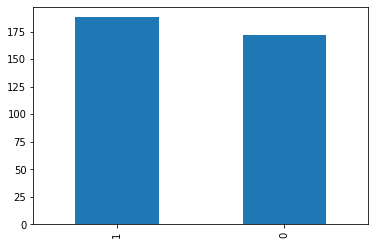

In [ ]:
df['target'].value_counts().plot(kind="bar")

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(train,labels, test_size = 0.33, stratify = labels)

In [ ]:
import autosklearn.classification
cls = autosklearn.classification.AutoSklearnClassifier(time_left_for_this_task=3600)
cls.fit(x_train, y_train)
print(roc_auc_score(y_test,cls.predict(x_test)))
import joblib
# now you can save it to a file
joblib.dump(cls, '/content/drive/MyDrive/topcoder/11.pkl') 
# and later you can load it
cls = joblib.load('/content/drive/MyDrive/topcoder/11.pkl')

0.9736842105263158


In [ ]:
cls.leaderboard(detailed=True)

,rank,ensemble_weight,type,cost,duration,config_id,train_loss,seed,start_time,end_time,budget,status,data_preprocessors,feature_preprocessors,balancing_strategy,config_origin
model_id,,,,,,,,,,,,,,,,
543,1,0.06,extra_trees,0.0125,2.159392,542,0.049689,0,1.653754e+09,1.653754e+09,0.0,StatusType.SUCCESS,[],[extra_trees_preproc_for_classification],none,Local Search
532,2,0.04,extra_trees,0.0125,2.191228,531,0.043478,0,1.653753e+09,1.653753e+09,0.0,StatusType.SUCCESS,[],[extra_trees_preproc_for_classification],none,Local Search
486,3,0.02,extra_trees,0.0250,2.028820,485,0.043478,0,1.653753e+09,1.653753e+09,0.0,StatusType.SUCCESS,[],[extra_trees_preproc_for_classification],none,Local Search
550,4,0.06,extra_trees,0.0250,1.948127,549,0.049689,0,1.653754e+09,1.653754e+09,0.0,StatusType.SUCCESS,[],[select_rates_classification],none,Local Search
539,5,0.04,extra_trees,0.0250,1.923791,538,0.037267,0,1.653754e+09,1.653754e+09,0.0,StatusType.SUCCESS,[],[no_preprocessing],none,Local Search
538,6,0.02,extra_trees,0.0250,1.912199,537,0.031056,0,1.653754e+09,1.653754e+09,0.0,StatusType.SUCCESS,[],[no_preprocessing],none,Local Search
499,7,0.02,extra_trees,0.0250,2.203067,498,0.043478,0,1.653753e+09,1.653753e+09,0.0,StatusType.SUCCESS,[],[extra_trees_preproc_for_classification],none,Local Search
563,8,0.04,extra_trees,0.0250,2.242557,562,0.037267,0,1.653754e+09,1.653754e+09,0.0,StatusType.SUCCESS,[],[extra_trees_preproc_for_classification],none,Local Search
565,9,0.06,extra_trees,0.0250,2.120694,564,0.043478,0,1.653754e+09,1.653754e+09,0.0,StatusType.SUCCESS,[],[extra_trees_preproc_for_classification],none,Local Search


In [ ]:
cls.show_models()

{262: {'balancing': Balancing(random_state=1, strategy='weighting'),
  'classifier': <autosklearn.pipeline.components.classification.ClassifierChoice at 0x7f106c35eed0>,
  'cost': 0.03749999999999998,
  'data_preprocessor': <autosklearn.pipeline.components.data_preprocessing.DataPreprocessorChoice at 0x7f106c2e4790>,
  'ensemble_weight': 0.06,
  'feature_preprocessor': <autosklearn.pipeline.components.feature_preprocessing.FeaturePreprocessorChoice at 0x7f106c35edd0>,
  'model_id': 262,
  'rank': 10,
  'sklearn_classifier': ExtraTreesClassifier(bootstrap=True, max_features=4, min_samples_leaf=19,
                       min_samples_split=15, n_estimators=512, n_jobs=1,
                       random_state=1, warm_start=True)},
 365: {'balancing': Balancing(random_state=1, strategy='weighting'),
  'classifier': <autosklearn.pipeline.components.classification.ClassifierChoice at 0x7f106b550a50>,
  'cost': 0.03749999999999998,
  'data_preprocessor': <autosklearn.pipeline.components.data_pre

In [ ]:
import autosklearn.classification
cls = autosklearn.classification.AutoSklearnClassifier(time_left_for_this_task=300)
cls.fit(x_train, y_train)
roc_auc_score(y_test,cls.predict(x_test))

0.9831635540464063

In [ ]:
import joblib
# now you can save it to a file
joblib.dump(cls, '/content/drive/MyDrive/topcoder/1.pkl') 
# and later you can load it
cls = joblib.load('/content/drive/MyDrive/topcoder/1.pkl')

In [ ]:
roc_auc_score(y_test,cls.predict(x_test))

0.9824561403508771

In [ ]:
cls.leaderboard(detailed=True)  

,rank,ensemble_weight,type,cost,duration,config_id,train_loss,seed,start_time,end_time,budget,status,data_preprocessors,feature_preprocessors,balancing_strategy,config_origin
model_id,,,,,,,,,,,,,,,,
8,1,0.02,gradient_boosting,0.0250,1.440141,7,0.000000,0,1.653742e+09,1.653742e+09,0.0,StatusType.SUCCESS,[],[liblinear_svc_preprocessor],none,Initial design
14,2,0.04,gradient_boosting,0.0250,1.303391,13,0.000000,0,1.653742e+09,1.653742e+09,0.0,StatusType.SUCCESS,[],[no_preprocessing],none,Initial design
59,3,0.02,gradient_boosting,0.0375,1.096455,58,0.018634,0,1.653743e+09,1.653743e+09,0.0,StatusType.SUCCESS,[],[no_preprocessing],weighting,Local Search
48,4,0.02,gradient_boosting,0.0375,1.463546,47,0.000000,0,1.653743e+09,1.653743e+09,0.0,StatusType.SUCCESS,[],[feature_agglomeration],weighting,Local Search
47,5,0.02,gradient_boosting,0.0375,1.334688,46,0.006211,0,1.653743e+09,1.653743e+09,0.0,StatusType.SUCCESS,[],[feature_agglomeration],weighting,Local Search
32,6,0.02,gradient_boosting,0.0500,1.192456,31,0.000000,0,1.653743e+09,1.653743e+09,0.0,StatusType.SUCCESS,[],[liblinear_svc_preprocessor],none,Local Search
25,7,0.06,mlp,0.0500,1.824756,24,0.031056,0,1.653742e+09,1.653742e+09,0.0,StatusType.SUCCESS,[],[extra_trees_preproc_for_classification],weighting,Initial design
2,8,0.02,random_forest,0.0500,4.662750,1,0.000000,0,1.653742e+09,1.653742e+09,0.0,StatusType.SUCCESS,[],[no_preprocessing],none,Initial design
12,9,0.06,random_forest,0.0500,2.429206,11,0.006211,0,1.653742e+09,1.653742e+09,0.0,StatusType.SUCCESS,[],[extra_trees_preproc_for_classification],weighting,Initial design


In [ ]:
cls.show_models()

In [ ]:
import autosklearn.classification
cls2 = autosklearn.classification.AutoSklearnClassifier(time_left_for_this_task=600,metric = roc_auc)
cls2.fit(x_train, y_train,)
roc_auc_score(y_test,cls2.predict(x_test))

In [ ]:
roc_auc_score(y_test,cls2.predict(x_test))

0.9919354838709677

In [ ]:
cls2.leaderboard(detailed=True)  

,rank,ensemble_weight,type,cost,duration,config_id,train_loss,seed,start_time,end_time,budget,status,data_preprocessors,feature_preprocessors,balancing_strategy,config_origin
model_id,,,,,,,,,,,,,,,,
93,1,0.06,passive_aggressive,0.000000,1.063640,92,0.007421,0,1.653745e+09,1.653745e+09,0.0,StatusType.SUCCESS,[],[feature_agglomeration],weighting,Local Search
91,2,0.04,passive_aggressive,0.000000,1.103573,90,0.001082,0,1.653745e+09,1.653745e+09,0.0,StatusType.SUCCESS,[],[feature_agglomeration],weighting,Local Search
90,3,0.02,passive_aggressive,0.000627,1.070163,89,0.001082,0,1.653745e+09,1.653745e+09,0.0,StatusType.SUCCESS,[],[feature_agglomeration],weighting,Local Search
88,4,0.04,passive_aggressive,0.001253,0.942494,87,0.000773,0,1.653745e+09,1.653745e+09,0.0,StatusType.SUCCESS,[],[feature_agglomeration],none,Local Search
87,5,0.04,passive_aggressive,0.001253,1.105098,86,0.001237,0,1.653745e+09,1.653745e+09,0.0,StatusType.SUCCESS,[],[feature_agglomeration],weighting,Local Search
95,6,0.06,passive_aggressive,0.001253,1.078819,94,0.001391,0,1.653745e+09,1.653745e+09,0.0,StatusType.SUCCESS,[],[feature_agglomeration],weighting,Local Search
68,7,0.02,passive_aggressive,0.001253,1.082619,67,0.002010,0,1.653745e+09,1.653745e+09,0.0,StatusType.SUCCESS,[],[feature_agglomeration],weighting,Local Search
100,8,0.08,passive_aggressive,0.001880,1.066679,99,0.000000,0,1.653745e+09,1.653745e+09,0.0,StatusType.SUCCESS,[],[feature_agglomeration],weighting,Local Search
79,9,0.06,passive_aggressive,0.001880,1.062150,78,0.003711,0,1.653745e+09,1.653745e+09,0.0,StatusType.SUCCESS,[],[feature_agglomeration],weighting,Random Search (sorted)


In [ ]:
import joblib
# now you can save it to a file
joblib.dump(cls2, '/content/drive/MyDrive/topcoder/3.pkl') 
# and later you can load it
cls2 = joblib.load('/content/drive/MyDrive/topcoder/3.pkl')

In [ ]:
model = lgb.LGBMClassifier(learning_rate=0.08,max_depth=-1, num_leaves=25)
model.fit(x_train,y_train,eval_set=[(x_test,y_test),(x_train,y_train)],
          verbose=10,eval_metric='auc')
roc_auc_score(y_test,model.predict_proba(x_test)[:,-1])

[10]	training's auc: 0.990718	training's binary_logloss: 0.340322	valid_0's auc: 0.970006	valid_0's binary_logloss: 0.379181
[20]	training's auc: 0.997999	training's binary_logloss: 0.182976	valid_0's auc: 0.973826	valid_0's binary_logloss: 0.265653
[30]	training's auc: 0.999586	training's binary_logloss: 0.109093	valid_0's auc: 0.972269	valid_0's binary_logloss: 0.215055
[40]	training's auc: 0.999862	training's binary_logloss: 0.0687046	valid_0's auc: 0.978778	valid_0's binary_logloss: 0.193392
[50]	training's auc: 1	training's binary_logloss: 0.0416861	valid_0's auc: 0.979061	valid_0's binary_logloss: 0.177386
[60]	training's auc: 1	training's binary_logloss: 0.0254026	valid_0's auc: 0.981607	valid_0's binary_logloss: 0.164857
[70]	training's auc: 1	training's binary_logloss: 0.015513	valid_0's auc: 0.981041	valid_0's binary_logloss: 0.164751
[80]	training's auc: 1	training's binary_logloss: 0.00957824	valid_0's auc: 0.982173	valid_0's binary_logloss: 0.163854
[90]	training's auc: 1	

0.9833050367855122

In [ ]:
model = xgb.XGBClassifier(learning_rate=0.08)
model.fit(x_train,y_train,eval_set=[(x_test,y_test),(x_train,y_train)],
          verbose=20,eval_metric='auc')
roc_auc_score(y_test,model.predict_proba(x_test)[:,-1])

[0]	validation_0-auc:0.949774	validation_1-auc:0.988751
[20]	validation_0-auc:0.979061	validation_1-auc:0.999724
[40]	validation_0-auc:0.982598	validation_1-auc:1
[60]	validation_0-auc:0.982315	validation_1-auc:1
[80]	validation_0-auc:0.979909	validation_1-auc:1
[99]	validation_0-auc:0.980475	validation_1-auc:1


0.9804753820033956

In [ ]:
import joblib
# now you can save it to a file
joblib.dump(model, '/content/drive/MyDrive/topcoder/5.pkl') 
# and later you can load it
model = joblib.load('/content/drive/MyDrive/topcoder/5.pkl')

<BarContainer object of 25 artists>

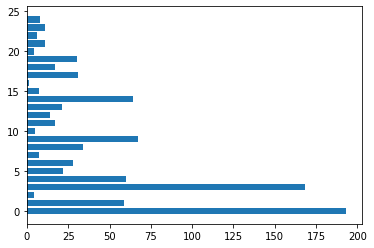

In [ ]:
plt.barh(columns[:-1],model.feature_importances_) # 0,1,3,4,9,14

In [ ]:
y_train.values.flatten()

array([1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0,
       0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1,
       0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0,
       1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1,
       0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0,
       0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1,
       1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1,
       1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0])

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(train,labels, test_size = 0.03, stratify = labels)
len(y_test)

11

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(train,labels, test_size = 0.10, stratify = labels)
clf = TabNetClassifier(verbose = 20)  #TabNetRegressor()
clf.fit(x_train.values, y_train.values.flatten(), 
        max_epochs = 400,
        batch_size = 15)
roc_auc_score(y_test.values.flatten(),clf.predict_proba(x_test.values)[:,-1])

Device used : cpu
No early stopping will be performed, last training weights will be used.
epoch 0  | loss: 0.78816 |  0:00:00s
epoch 20 | loss: 0.20319 |  0:00:13s
epoch 40 | loss: 0.18877 |  0:00:26s
epoch 60 | loss: 0.1788  |  0:00:33s
epoch 80 | loss: 0.24367 |  0:00:38s
epoch 100| loss: 0.16911 |  0:00:44s
epoch 120| loss: 0.26768 |  0:00:50s
epoch 140| loss: 0.1506  |  0:00:55s
epoch 160| loss: 0.16879 |  0:01:01s
epoch 180| loss: 0.14667 |  0:01:07s
epoch 200| loss: 0.2328  |  0:01:14s
epoch 220| loss: 0.1525  |  0:01:19s
epoch 240| loss: 0.1683  |  0:01:24s
epoch 260| loss: 0.18855 |  0:01:30s
epoch 280| loss: 0.17194 |  0:01:36s
epoch 300| loss: 0.18755 |  0:01:41s
epoch 320| loss: 0.1919  |  0:01:47s
epoch 340| loss: 0.12511 |  0:01:53s
epoch 360| loss: 0.18718 |  0:01:58s
epoch 380| loss: 0.15994 |  0:02:04s


0.9845201238390092

In [ ]:
list(clf.predict_proba(x_test.values)[:,-1])

[3.2119537e-05,
 0.13379508,
 0.9999896,
 0.00062917784,
 0.9999994,
 0.99999547,
 0.6595776,
 0.99989676,
 0.0003258643,
 0.9999771,
 0.00045291946,
 1.0,
 0.99999964,
 1.8220724e-06,
 1.0,
 0.0003376744,
 0.9203038,
 7.0562936e-07]

In [ ]:
import joblib
# now you can save it to a file
joblib.dump(clf, '/content/drive/MyDrive/topcoder/7.pkl') 
# and later you can load it
clf = joblib.load('/content/drive/MyDrive/topcoder/7.pkl')